In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Preprocessing

#Load data
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [4]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [5]:
tr_df = train_df('D:\panacealogics\Deep_learn_CNN\BrainTumorData\Training')

In [6]:
tr_df


,Class Path,Class
0,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
1,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
2,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
3,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
4,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
...,...,...
5707,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,pituitary
5708,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,pituitary
5709,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,pituitary
5710,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,pituitary


In [7]:
ts_df = test_df('D:\panacealogics\Deep_learn_CNN\BrainTumorData\Testing')


In [8]:
ts_df 

,Class Path,Class
0,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
1,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
2,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
3,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
4,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
...,...,...
1306,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,pituitary
1307,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,pituitary
1308,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,pituitary
1309,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,pituitary


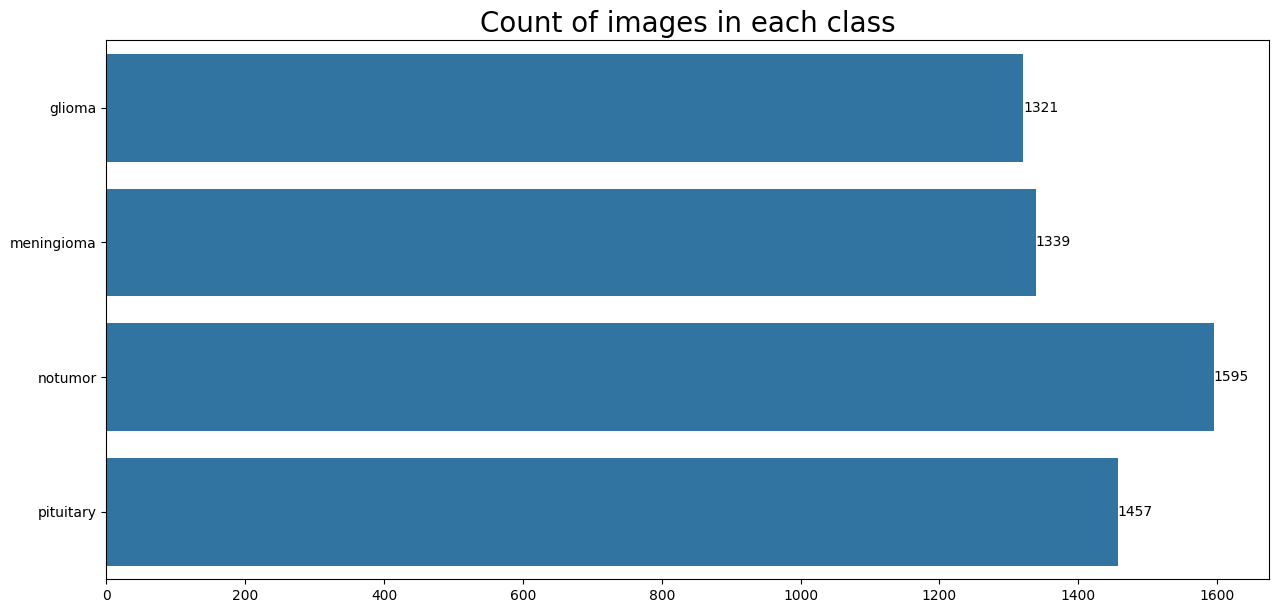

In [9]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

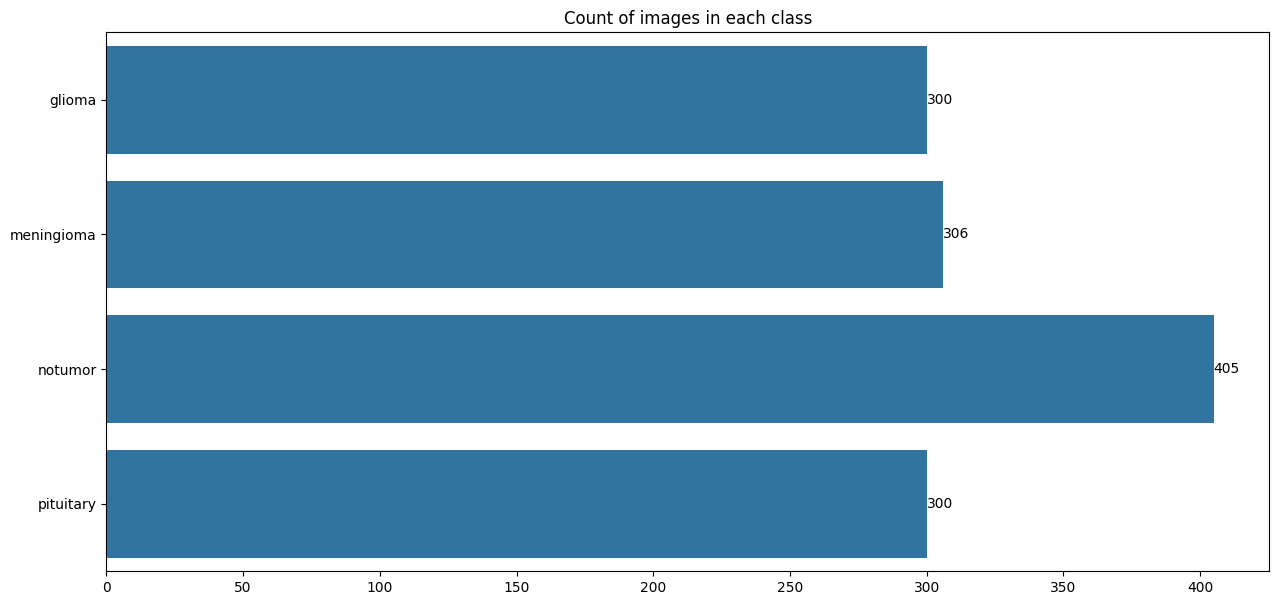

In [10]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
#Split data into train, test, valid

valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
286,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
318,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,meningioma
1072,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,pituitary
373,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,meningioma
109,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
...,...,...
59,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
860,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,notumor
273,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,glioma
494,D:\panacealogics\Deep_learn_CNN\BrainTumorData...,meningioma


In [ ]:
#Data preprocessing
 #Data Augmentation

batch_size = 32
img_size = (224, 224)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


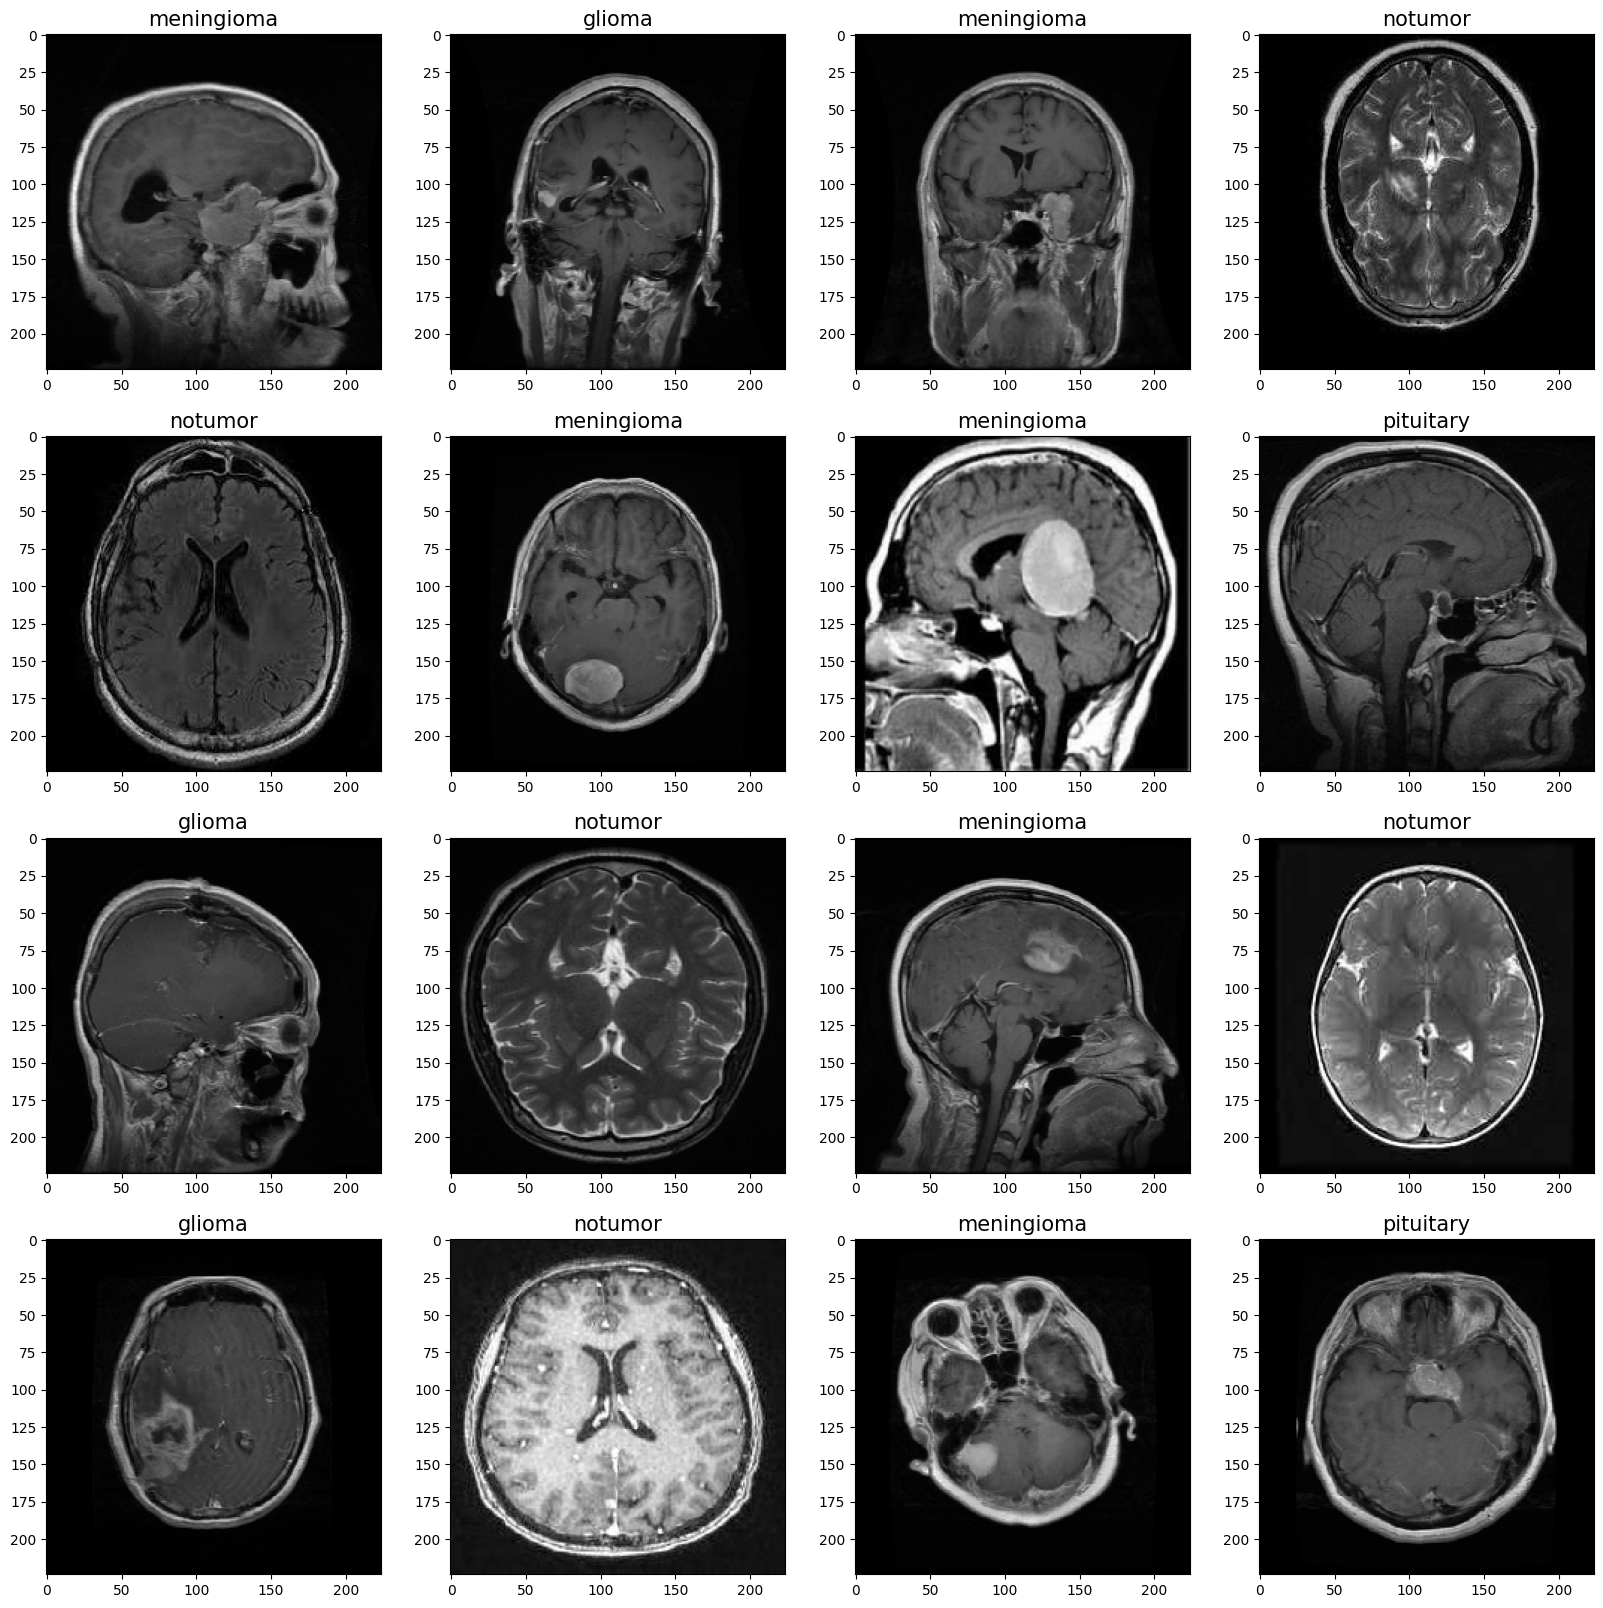

In [ ]:
#Getting samples from data

class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [ ]:
#CNN MODEL
# Building Deep Learning Model
model =Sequential()

model.add(Conv2D(filters=16 , kernel_size= (3,3), activation ='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36 , kernel_size= (3,3), activation ='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64 , kernel_size= (3,3), activation ='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128 , kernel_size= (3,3), activation ='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,440 (21.51 MB)

 Trainable params: 5,638,440 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

In [ ]:
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

In [14]:
from tensorflow.keras.models import load_model

model = load_model("my_cnn_model.h5")  # or "my_cnn_model.keras"


In [15]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 137s 721ms/step - accuracy: 0.9959 - loss: 0.0181 - precision_1: 0.9959 - recall_1: 0.9959
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 611ms/step - accuracy: 0.9541 - loss: 0.2594 - precision_1: 0.9541 - recall_1: 0.9541
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - accuracy: 0.9755 - loss: 0.0615 - precision_1: 0.9760 - recall_1: 0.9722
Train Loss: 0.0196
Train Accuracy: 99.58%
--------------------
Validation Loss: 0.1985
Validation Accuracy: 95.73%
--------------------
Test Loss: 0.0797
Test Accuracy: 96.34%


In [16]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step


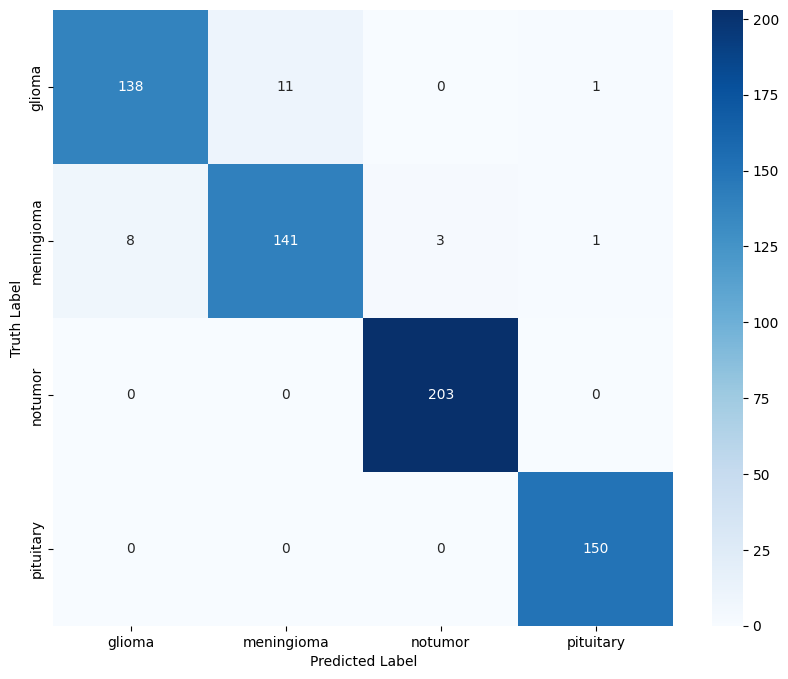

In [21]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [22]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       150
           1       0.93      0.92      0.92       153
           2       0.99      1.00      0.99       203
           3       0.99      1.00      0.99       150

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



In [ ]:
def predict(img_path):
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path).convert('RGB') # Convert image to RGB format
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0) #[1,224,224,3])
    img = img / 255.0 # Ensure division by a float for consistent scaling
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


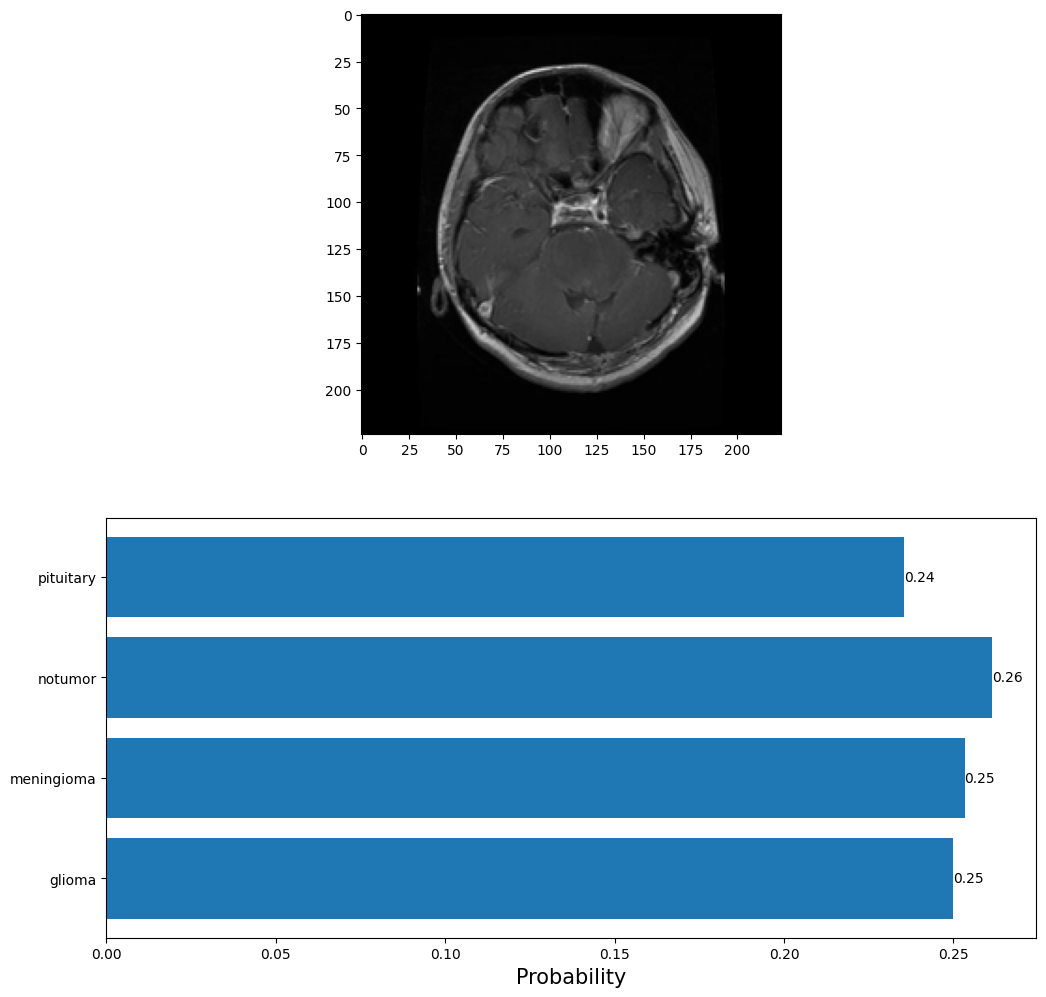

In [24]:
predict('D:\panacealogics\Deep_learn_CNN\BrainTumorData\Testing\glioma\Te-gl_0010.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


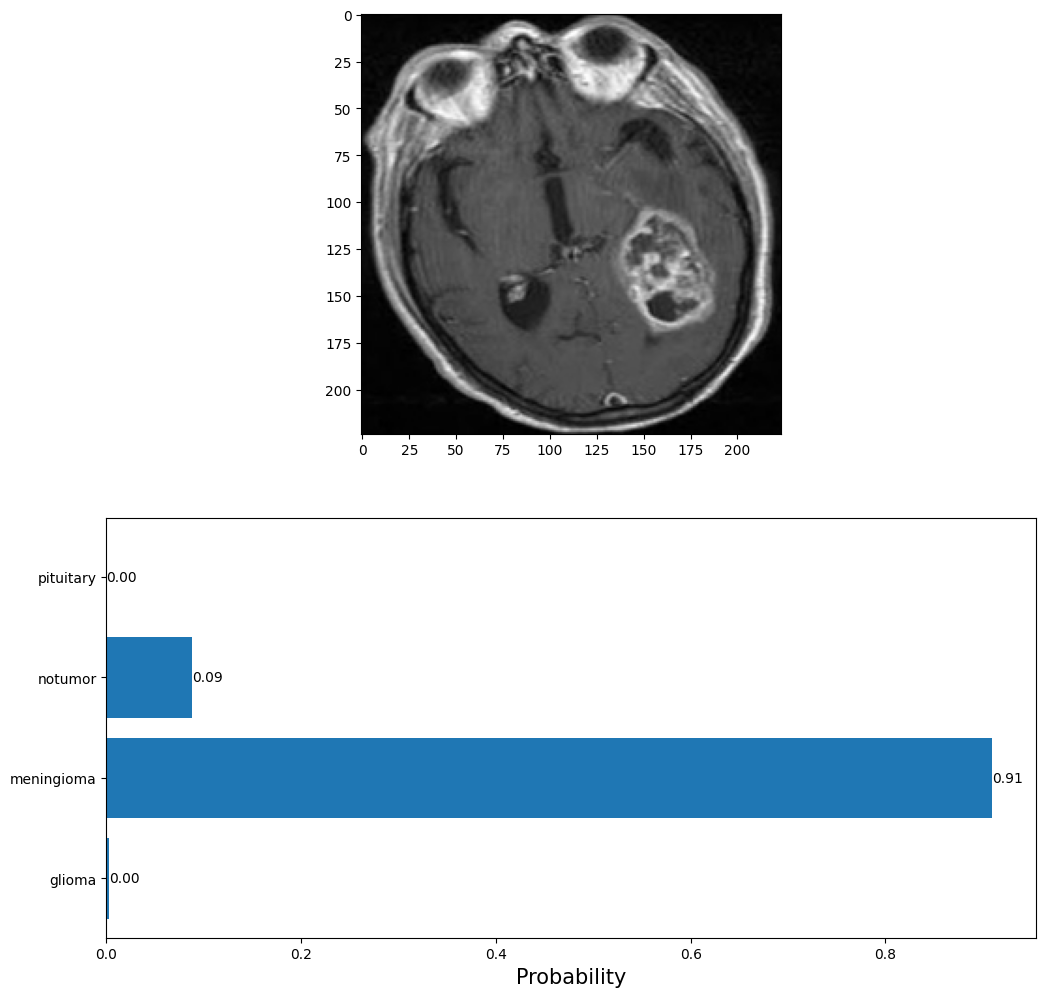

In [31]:
predict('D:\panacealogics\Deep_learn_CNN\BrainTumorData\Testing\meningioma\Te-meTr_0001.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


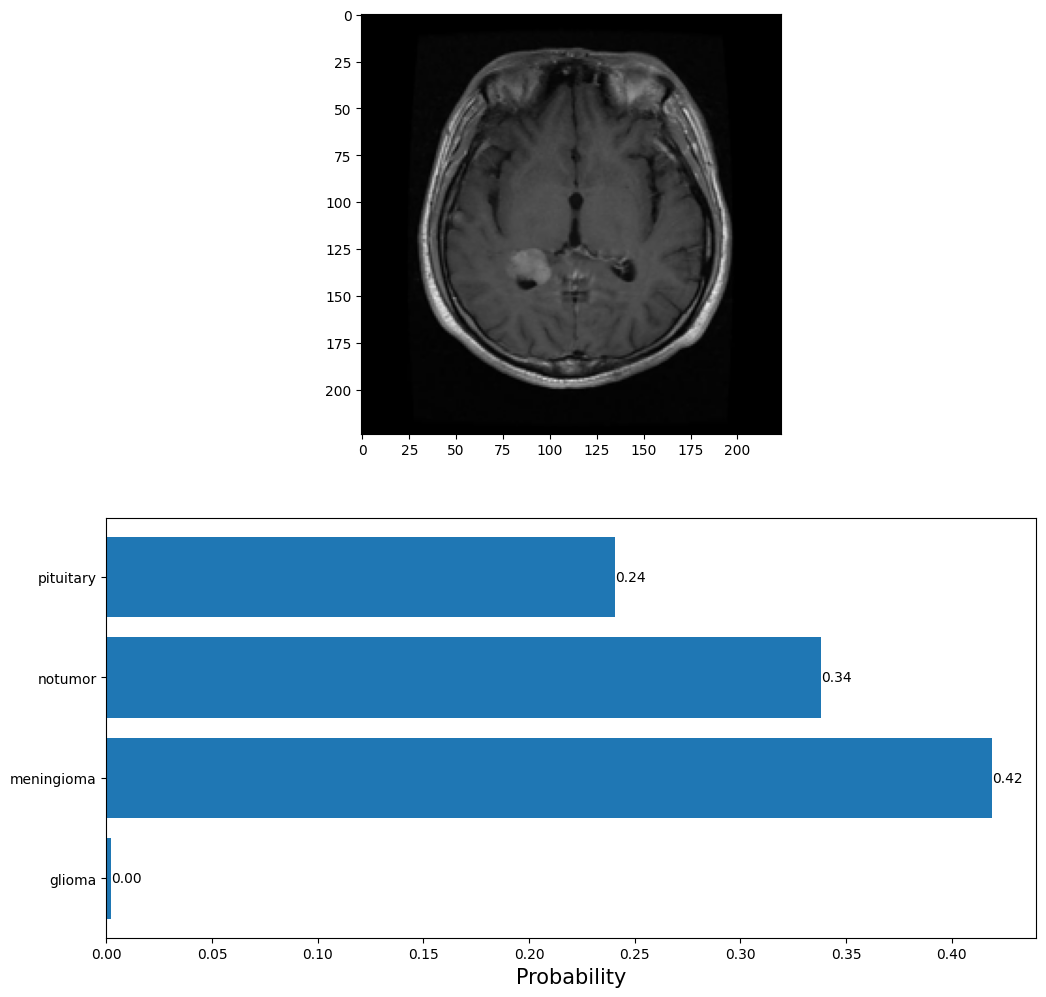

In [32]:
predict('D:\panacealogics\Deep_learn_CNN\BrainTumorData\Testing\meningioma\Te-me_0297.jpg')
